In [ ]:
#MODULO-2 - Desafio - jogadores

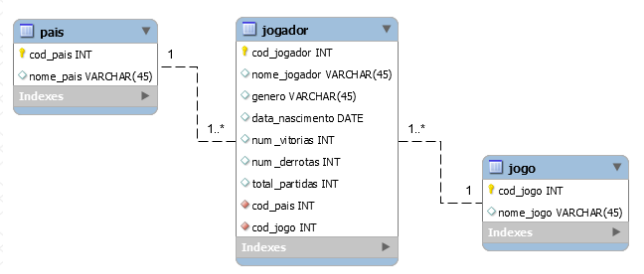

In [1]:
##IMAGENS:
from IPython import display 
display.Image("Modelo_de_dados_desafio.PNG")

In [1]:
import pandas as pd
import os
import sqlite3
from pathlib import Path
from datetime import date

In [2]:
# CARREGA DO ARQUIVO
file = Path(".\\base_desafio\\dados_jogadores.csv")

In [3]:
df = pd.read_csv(file, sep=';')
df

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
0,jogador 1,Masculino,03/09/1990,Dama,Chile,14.0,0.0,14.0
1,Jogador 2,Feminino,01/05/1986,Jogo da velha,Chile,39.0,20.0,59.0
2,Jogador 3,Masculino,04/10/1964,Jogo da velha,Brasil,26.0,3.0,29.0
3,Jogador 4,Masculino,28/09/1979,Jogo da velha,Argentina,9.0,72.0,81.0
4,Jogador 5,Masculino,03/09/1978,Dama,Uruguai,1.0,54.0,55.0
...,...,...,...,...,...,...,...,...
494,Jogador 495,Feminino,03/06/1974,Dama,Chile,52.0,28.0,80.0
495,Jogador 496,Masculino,09/02/1959,Dama,Chile,13.0,51.0,64.0
496,Jogador 497,Masculino,06/01/1962,Jogo da velha,Argentina,57.0,NaN,80.0
497,Jogador 498,Masculino,28/09/1958,Jogo da velha,Chile,5.0,3.0,8.0


In [4]:
df.dtypes

jogador             object
genero              object
data_nascimento     object
jogo                object
pais                object
num_vitorias       float64
num_derrotas       float64
total_partidas     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jogador          499 non-null    object 
 1   genero           499 non-null    object 
 2   data_nascimento  499 non-null    object 
 3   jogo             499 non-null    object 
 4   pais             499 non-null    object 
 5   num_vitorias     491 non-null    float64
 6   num_derrotas     494 non-null    float64
 7   total_partidas   491 non-null    float64
dtypes: float64(3), object(5)
memory usage: 31.3+ KB


In [5]:
df.isnull().sum()

jogador            0
genero             0
data_nascimento    0
jogo               0
pais               0
num_vitorias       8
num_derrotas       5
total_partidas     8
dtype: int64

In [8]:
## Tratar o campo data de nascimento:
df['data_nascimento'] = pd.to_datetime(df.data_nascimento)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   jogador          499 non-null    object        
 1   genero           499 non-null    object        
 2   data_nascimento  499 non-null    datetime64[ns]
 3   jogo             499 non-null    object        
 4   pais             499 non-null    object        
 5   num_vitorias     491 non-null    float64       
 6   num_derrotas     494 non-null    float64       
 7   total_partidas   491 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 31.3+ KB


In [21]:
## Linhas com valores nulos:
df.loc[pd.isnull(df).any(1),:]

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas


In [14]:
## TRATAMENTO DE VALORES FALTANTES
df['num_vitorias'] = df['num_vitorias'].fillna(df['total_partidas'] - df['num_derrotas'])
df['num_derrotas'] = df['num_derrotas'].fillna(df['total_partidas'] - df['num_vitorias'])
df['total_partidas'] = df['total_partidas'].fillna(df['num_derrotas'] - df['num_vitorias'])

In [22]:
## Qual o país possui a maior média de vitórias? No geral (independente do jogo).
df.groupby('pais').mean('num_vitorias').sort_values('num_vitorias' , ascending=False)

,num_vitorias,num_derrotas,total_partidas
pais,,,
Chile,27.800000,24.080000,51.880000
Argentina,25.897727,21.215909,44.409091
Brasil,25.340000,20.530000,44.790000
Uruguai,23.943820,23.415730,46.820225
Paraguai,22.581967,25.245902,46.336066


In [54]:
#Qual país possui o maior número de derrotas no Jogo da velha?
df[['jogo','pais','num_derrotas']].query("jogo == 'Jogo da velha' ").groupby('pais').sum('num_derrotas').sort_values('num_derrotas' , ascending=False)

,num_derrotas
pais,
Paraguai,934.0
Chile,860.0
Argentina,825.0
Brasil,729.0
Uruguai,703.0


In [55]:
#Qual o jogo possui o maior número de partidas?
df[['jogo','total_partidas']].groupby('jogo').sum('total_partidas').sort_values('total_partidas' , ascending=False)

,total_partidas
jogo,
Xadrez,8068.0
Dama,7725.0
Jogo da velha,7722.0


In [59]:
#Qual o jogo preferido entre as mulheres?
df[['jogo','genero','total_partidas']].query("genero == 'Feminino' ").groupby('jogo').sum('total_partidas').sort_values('total_partidas' , ascending=False)

,total_partidas
jogo,
Dama,4134.0
Xadrez,3999.0
Jogo da velha,3638.0


In [60]:
#Qual o pais com mais jogadores de Dama?
df[['pais','jogo','total_partidas']].query("jogo == 'Dama' ").groupby('pais').sum('total_partidas').sort_values('total_partidas' , ascending=False)

,total_partidas
pais,
Paraguai,2364.0
Chile,1592.0
Brasil,1332.0
Uruguai,1253.0
Argentina,1184.0


## MOGNODB : CHESS

In [88]:
# Importamos o Módulo PyMongo
import pymongo
import json
import pprint

In [62]:
# Criando a conexão com o MongoDB (neste caso, conexão padrão)
client_con = pymongo.MongoClient()

In [63]:
# Listando os bancos de dados disponíveis
client_con.database_names()

ipykernel_launcher:2: DeprecationWarning: database_names is deprecated. Use list_database_names instead.


['admin',
 'cadastrodb',
 'config',
 'db_igti',
 'local',
 'nydp',
 'tweetsdb',
 'twitterdb',
 'twitterdb_ishtar']

In [64]:
# Definindo o objeto db
db = client_con.chess_api

In [66]:
# Listando as coleções disponíveis
db.list_collection_names()

[]

In [67]:
# Criando uma coleção
db.create_collection("lista_jogadores_chess")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'chess_api'), 'lista_jogadores_chess')

In [139]:
db.create_collection('forum_debates333')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'chess_api'), 'forum_debates333')

In [68]:
file = Path(".\\base_desafio\\lista_jogadores_chess.json")

In [69]:
with open(file, 'r') as file:
    arquivo = file.read()

In [73]:
json_dados = json.loads(arquivo)
json_dados.keys()

dict_keys(['user'])

In [79]:
type(json_dados)

dict

In [80]:
db.list_collection_names()

['lista_jogadores_chess']

In [131]:
 db.lista_jogadores_chess.$types

SyntaxError: invalid syntax (<ipython-input-131-1c8ef0c5ef55>, line 1)

In [85]:
for dado in json_dados['user']:
    dado_id =  db.lista_jogadores_chess.insert_one(dado)
    dado_id.inserted_id

In [129]:
db.lista_jogadores_chess

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'chess_api'), 'lista_jogadores_chess')

In [87]:
 db.lista_jogadores_chess.find_one()

{'_id': ObjectId('606090aaaaae2af4d3c627ee'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/18800602.e26b721f.200x200o.e738019a328a.jpeg',
 'player_id': 18800602,
 '@id': 'https://api.chess.com/pub/player/123lt',
 'url': 'https://www.chess.com/member/123lt',
 'name': 'Tingjie Lei',
 'username': '123lt',
 'title': 'GM',
 'followers': 36,
 'country': 'https://api.chess.com/pub/country/CN',
 'last_online': 1615967972,
 'joined': 1410059361,
 'status': 'premium',
 'is_streamer': False}

In [86]:
 ## Quantos registros possuem na base de dados do chess?
 db.lista_jogadores_chess.estimated_document_count()

1332

16

In [108]:
# Quantos jogadores são do Brasil?
# https://docs.mongodb.com/manual/reference/operator/query/regex/

## SQL LIKE:
# SELECT * FROM lista_jogadores_chess  WHERE 'country' like "%/BR";
db.lista_jogadores_chess.count_documents({'country' : {'$regex': '/BR'}})
#db.lista_jogadores_chess.count_documents({'country' : 'https://api.chess.com/pub/country/BR'})


16

In [122]:
# Quantos seguidores (número de pessoas) possue o jogador Rafael Leitao?
db.lista_jogadores_chess.find_one(
    {'name' : 
            {'$regex': 'Rafael Leitao'} },
    {'followers' : 1 , '_id' : 0}
)

{'followers': 1707}

In [128]:
#Quantas pessoas do dataset são streamer?
db.lista_jogadores_chess.count_documents({'is_streamer': True})

66

In [132]:
# Quantos jogadores possuem mais de 10.000 seguidores? (operador maior ou igual a que?)

db.lista_jogadores_chess.count_documents({'followers': {'$gte': 10000}})

13